Séries Temporais - Empréstimos por dia

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [113]:
data = "emprestimos_biblioteca_junho_2023.xlsx"
df = pd.read_excel(data, engine='openpyxl')

In [114]:
df['data_emprestimo'] = pd.to_datetime(df['DATA_EMPRESTIMO_CHAR'], errors='coerce', dayfirst=True)
df['data_devolucao'] = pd.to_datetime(df['DATA_DEV_EFETIVA_CHAR'], errors='coerce', dayfirst=True)

df['dias_emprestados'] = (df['data_devolucao'] - df['data_emprestimo']).dt.days

df = df[df['dias_emprestados'].notnull() & (df['dias_emprestados'] >= 0)]

df_grouped = df.groupby(['dias_emprestados']).size().reset_index(name='qtd_emprestimos')

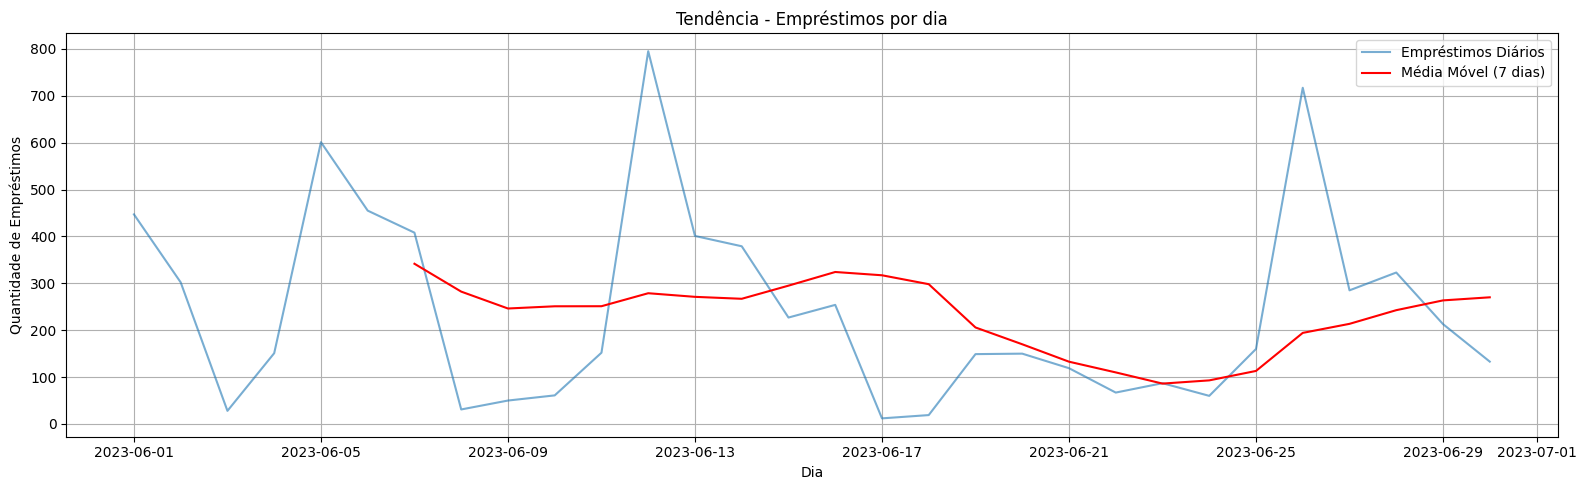

In [115]:
# Tendência
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

emprestimos_por_dia = df.groupby('data_emprestimo').size().sort_index()

serie = pd.DataFrame({'qtd_emprestimos': emprestimos_por_dia})
serie['MediaMovel_7'] = serie['qtd_emprestimos'].rolling(window=7).mean()

plt.figure(figsize=(16, 5))
plt.plot(serie['qtd_emprestimos'], label='Empréstimos Diários', alpha=0.6)
plt.plot(serie['MediaMovel_7'], label='Média Móvel (7 dias)', color='red')
plt.title('Tendência - Empréstimos por dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Empréstimos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

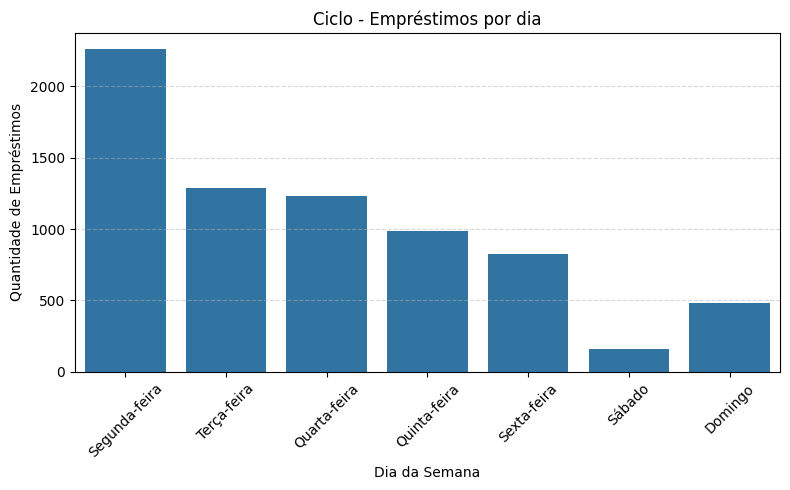

In [ ]:
# Ciclo
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

df['dia_semana'] = df['data_emprestimo'].dt.day_name(locale='pt_BR')

ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

semana = df.groupby('dia_semana').size().reindex(ordem)

plt.figure(figsize=(8, 5))
sns.barplot(x=semana.index, y=semana.values)
plt.title('Ciclo - Empréstimos por dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Empréstimos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

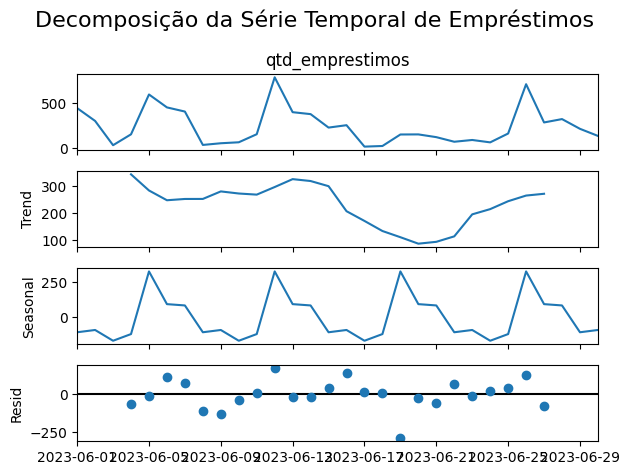

In [ ]:
# Decomposição da Série Temporal
from statsmodels.tsa.seasonal import seasonal_decompose

serie = serie.asfreq('D', fill_value=0)
decomposicao = seasonal_decompose(serie['qtd_emprestimos'], model='additive', period=7)

decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal de Empréstimos', fontsize=16)
plt.tight_layout()
plt.show()